In [1]:
!date
!pwd

Срд Мар  1 21:42:54 MSK 2017
/home/sphere/github/Sphere/SelectEAS


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import math as mt
import numpy as np

### Чтение данных

In [3]:
# чтение данных обработки экспериментальных событий как сигнала
rsignal = pd.read_csv('Result-Signal', index_col=0, sep='\s+')
print('events as signal:', len(rsignal))

# чтение данных обработки экспериментальных событий как шума
rnoise = pd.read_csv('Result-Noise', index_col=0, sep='\s+')
print('events as noise :', len(rnoise))

# слияние массивов
all=pd.merge(rsignal,rnoise,  suffixes=('_s','_n'), left_index=True, right_index=True, how='outer')
print('events in total :',len(all))
all[:3]

events as signal: 1911
events as noise : 1911
events in total : 1911


,SNRatio_s,AbsSignal_s,TotalNoise_s,NNear3,Theta,dt2_s,ng_s,SNRatio_n,AbsSignal_n,TotalNoise_n,dt2_n,ng_n
nev,,,,,,,,,,,,
10675,107.21170,381.888,3.562,31,0.204204,0.766965,34,37.680380,375.485,9.965,1.802776,32
10677,13.49221,719.364,53.317,51,0.486947,1.157275,56,0.497918,249.740,501.569,1.519109,13
10679,0.10180,61.124,600.431,9,1.193805,2.939874,14,0.077615,218.918,2820.565,1.058301,25


In [4]:
# чтение событий ШАЛ 
dima = pd.read_csv('namesEAS', header = 0, index_col=0, sep='\s+')
#dima = pd.read_csv('timur2013.csv', header = 0, index_col=2, sep='\s+')
eas  = pd.core.frame.DataFrame(dima, columns=['EAS'])
eas['EAS'] = int(1)
# добавляем признак ШАЛ к данным
data=all.join(eas)
# заменяем NAN на 0
data.fillna(0, inplace=True)
param=['EAS','SNRatio_s','SNRatio_n','AbsSignal_s','AbsSignal_n','TotalNoise_s','TotalNoise_n','NNear3','Theta','dt2_s','dt2_n','ng_s','ng_n'] 
data = data[param]
print('EAS: ', len(data[data['EAS']>0]))
data[:3]

EAS:  462


,EAS,SNRatio_s,SNRatio_n,AbsSignal_s,AbsSignal_n,TotalNoise_s,TotalNoise_n,NNear3,Theta,dt2_s,dt2_n,ng_s,ng_n
nev,,,,,,,,,,,,,
10675,1.0,107.21170,37.680380,381.888,375.485,3.562,9.965,31,0.204204,0.766965,1.802776,34,32
10677,1.0,13.49221,0.497918,719.364,249.740,53.317,501.569,51,0.486947,1.157275,1.519109,56,13
10679,0.0,0.10180,0.077615,61.124,218.918,600.431,2820.565,9,1.193805,2.939874,1.058301,14,25


 ### Простроение производных критериев

In [5]:
#Crit1 = NGood_s/NGood_n  *  Dt2_n/Dt2_s
data['Crit1'] = 10
data['Crit1'] = (data['ng_s']/data['ng_n'])  *  (data['dt2_n']/data['dt2_s'])
data=data.replace([np.inf, -np.inf], np.nan)
data.fillna(10, inplace=True)

#Crit2 = Noise_n/Noise_s  *  Signal_s/Signal_n
data['Crit2'] = (data['TotalNoise_n']/data['TotalNoise_s'])  *  (data['AbsSignal_s']/data['AbsSignal_n'])
data=data.replace([np.inf, -np.inf], np.nan)
data.fillna(1000, inplace=True)

data[data['Crit1']< 0.01]

,EAS,SNRatio_s,SNRatio_n,AbsSignal_s,AbsSignal_n,TotalNoise_s,TotalNoise_n,NNear3,Theta,dt2_s,dt2_n,ng_s,ng_n,Crit1,Crit2
nev,,,,,,,,,,,,,,,
10837,0.0,1.055363,0.291550,26.859,11.076,25.450,37.990,0,0.204204,1.000000,0.0,4,1,0.0,3.619832
10867,0.0,1.928841,0.000000,42.882,0.000,22.232,36.469,1,0.769690,2.000000,0.0,6,-1,-0.0,1000.000000
10914,0.0,1.063736,0.000000,49.318,0.000,46.363,130.863,2,0.769690,2.449490,0.0,7,-1,-0.0,1000.000000
10915,0.0,2.309445,0.000000,64.482,0.000,27.921,38.127,0,0.581195,1.549193,0.0,5,-1,-0.0,1000.000000
10934,0.0,0.899823,0.000000,40.097,0.000,44.561,24.414,1,0.565487,2.000000,0.0,6,-1,-0.0,1000.000000
10946,0.0,1.388321,0.294423,52.566,18.503,37.863,62.845,2,0.942478,2.236068,0.0,6,1,0.0,4.715399
11004,0.0,1.683143,0.000000,42.666,0.000,25.349,31.020,1,0.219911,0.707107,0.0,4,-1,-0.0,1000.000000
11186,1.0,37.086290,0.000000,140.965,0.000,3.801,118.098,2,0.486947,2.449490,0.0,9,-1,-0.0,1000.000000
11382,1.0,12.832990,0.824236,264.706,120.139,20.627,145.758,11,0.235619,0.801784,0.0,14,4,0.0,15.569552


In [6]:
# чтение данных обработки экспериментальных событий триггером
datum = pd.read_csv('../datum2013.txt', index_col=0)
# количество событий
len(datum)
del datum['EAS']
datum[:5]

,Type,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,delay,H,UTC
EID,,,,,,,,,,
10675,E,10,688,242,241,242,241,360,307.8,2013-03-09 18:16:20
10676,C,0,6104408,242,243,243,242,0,307.8,2013-03-09 18:16:20
10677,E,29,1336,241,240,243,240,112,307.8,2013-03-09 18:18:12
10678,C,0,6205188,242,242,243,242,0,307.8,2013-03-09 18:18:12
10679,D,76,7143,242,250,252,242,13,307.6,2013-03-09 18:18:25


In [7]:
junta=datum.join(data)
len(junta)

3813

In [8]:
print('data ',len(data))
Amax = 70000
dtmax = 5
print('Raw       :  all:',len(junta), ' EAS:', len(junta[junta.EAS==1]))
cand = junta[:][junta['Atotal'] < Amax] # 0 eas rejected
print('A < Amax  :  all:',len(cand), ' EAS:', len(cand[cand.EAS==1]))
cand = cand[:][cand['TRIGGER'] > 220]   # 0 eas rejected
print('Trig > 220:  all:',len(cand), ' EAS:', len(cand[cand.EAS==1]))
cand = cand[:][cand['TRIGGER'] < 300]  # 0 eas rejected
print('trig < 300:  all:',len(cand), ' EAS:', len(cand[cand.EAS==1]))
cand = cand[:][cand.Dt < 200]  # Dt>5: 5 eas rejected
print('Dt   < 200:  all:',len(cand), ' EAS:', len(cand[cand.EAS==1]))
cand = cand[:][cand.Dt > 5]  # Dt>5: 5 eas rejected
print('Dt   > ', dtmax,   ':  all:',len(cand), ' EAS:', len(cand[cand.EAS==1]))

data  1911
Raw       :  all: 3813  EAS: 462
A < Amax  :  all: 1912  EAS: 462
Trig > 220:  all: 1787  EAS: 462
trig < 300:  all: 1782  EAS: 462
Dt   < 200:  all: 1775  EAS: 462
Dt   >  5 :  all: 575  EAS: 457


# Методы ML

## Метод решающих деревьев

### Полное дерево

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
featur = list(cor_pearson.axes)
featur

NameError: name 'cor_pearson' is not defined

In [11]:
features = [ 'dt2_n', 'ng_n', 'dt2_s', 'AbsSignal_n', 'SNRatio_s',
        'Crit2', 'SNRatio_n', 'NNear3', 'Theta', 'ng_s', 'Crit1', 'AbsSignal_s','TotalNoise_s',
        'TotalNoise_n']
X = data[features]
print('events', len(X))
#X[:3]
type(features)

events 1911


list

In [12]:
Y = data['EAS']
len(Y)

1911

In [13]:
# Обучим решающее дерево с параметром random_state=241 и остальными параметрами по умолчанию.
clf = DecisionTreeClassifier(random_state=241)
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=241, splitter='best')

In [14]:
# Вычислим важности признаков и найдем признаки с наибольшей важностью. 
importances = clf.feature_importances_
for i in range(len(importances)):
    print("%15s   %f" % (features[i], importances[i]))

          dt2_n   0.002231
           ng_n   0.001427
          dt2_s   0.005831
    AbsSignal_n   0.000000
      SNRatio_s   0.013776
          Crit2   0.007101
      SNRatio_n   0.000000
         NNear3   0.002379
          Theta   0.002141
           ng_s   0.001421
          Crit1   0.774521
    AbsSignal_s   0.179742
   TotalNoise_s   0.009432
   TotalNoise_n   0.000000


### Построение дерева

In [15]:
clf.decision_path(X)

<1911x35 sparse matrix of type '<class 'numpy.int64'>'
	with 9579 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree_full.dot')  

In [17]:
# create png
from IPython.display import Image  
import pydotplus 

target_names = ['Noise','EAS']
dot_data = tree.export_graphviz(clf, out_file=None, 
                feature_names=features,  
                class_names=target_names,  
                filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
#Image(graph.create_png()) 
#graph.write_png("tree.png")

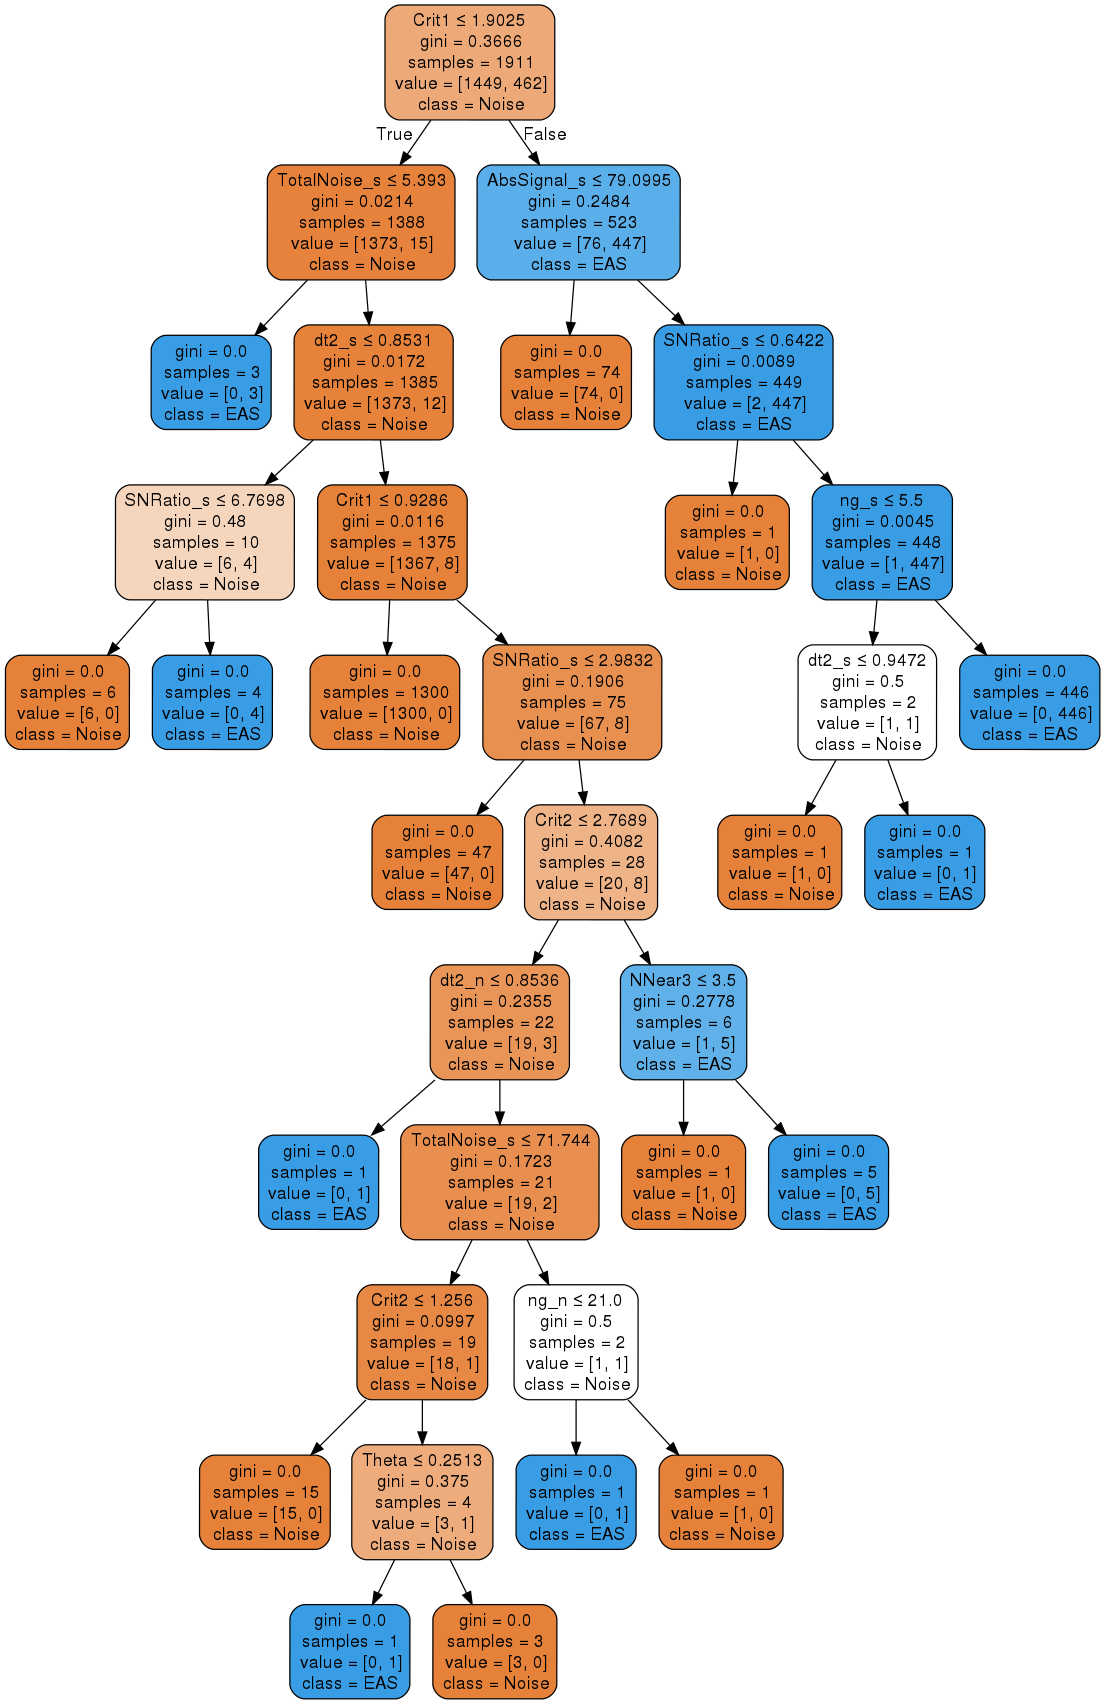

In [18]:
# нарисовать дерево через танец с бубнами
graph.write_svg("tree_full.svg")
!rsvg tree_full.svg tree_full0.png
Image("tree_full0.png") 

In [19]:
# 
clf.score(X,Y)

1.0

In [20]:
clf.apply(X)

array([34, 34,  8, ...,  8,  8,  8])

### Уменьшим количество признаков

['Crit1', 'AbsSignal_s']
0.995290423862
               Crit1   0.803983
         AbsSignal_s   0.196017
[ 1.  1.  0. ...,  0.  0.  0.]



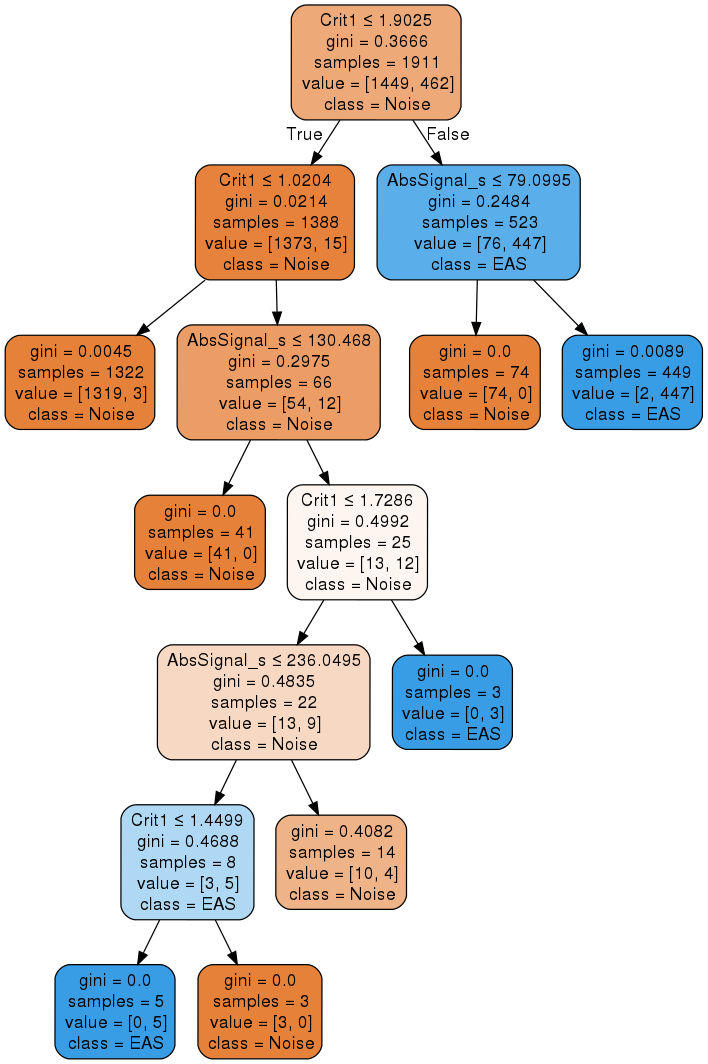

In [21]:
params = [ 'Crit1', 'AbsSignal_s','SNRatio_s', 'TotalNoise_s', 'dt2_n', 'ng_n', 'dt2_s',  
        'Crit2',  'NNear3', 'Theta', 'ng_s', 'SNRatio_n','AbsSignal_n','TotalNoise_n']
features = params [:2]
print(features)
X = data[features]
Y = data['EAS']
# Обучим решающее дерево с параметром random_state=241 и остальными параметрами по умолчанию.
clf = DecisionTreeClassifier(random_state=20, min_samples_leaf=2, max_leaf_nodes=8)
clf.fit(X, Y)
print(clf.score(X,Y))

# Вычислим важности признаков и найдем признаки с наибольшей важностью. 
importances = clf.feature_importances_
for i in range(len(importances)):
    print("%20s   %7f" % (features[i], importances[i]))
    
dot_data = tree.export_graphviz(clf, out_file=None, 
                feature_names=features,  
                class_names=target_names,  
                filled=True, rounded=True, special_characters=True)  
zz=clf.apply(X)
zz=clf.predict(X)
print(zz)

graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_svg("tree_full6.svg")
!rsvg tree_full6.svg tree_full6.png
Image("tree_full6.png") 

In [23]:
# построим дерево по 5 признакам
clf.decision_path(X)
tree.export_graphviz(clf, out_file='tree.dot')  
target_names = ['Noise','EAS']
dot_data = tree.export_graphviz(clf, out_file=None, 
                feature_names=features,  
                class_names=target_names,  
                filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_svg("tree_fullDt5.svg")
!rsvg tree_full6.svg tree_full6.png
Image("tree_fullDt5.png") 
#graph.write_png("tree5-8-2.png")
#graph.write_pdf("tree5-8-2.pdf")
#Image(graph.create_png())  

# ESLE

In [ ]:
clf.score(X,Y)

In [ ]:
clf.apply(X)

In [ ]:
XX = clf._validate_X_predict(X, check_input=True)

#tr = clf.tree_.decision_path(XX)
print(XX)

In [ ]:
Z=clf.predict_proba(X)
Z

In [ ]:
len(Z[:])

In [ ]:
help(DecisionTreeClassifier)

In [ ]:
print( '\nclf Attributes...' )
for atttribute in dir( clf ):
    if atttribute[0] != '_':
        print( atttribute, ':', getattr( clf , atttribute ) )